In [1]:
import os
os.chdir('/home/tristan/Research/Su24/orcml')
from src.data import *
from src.embeddings import *
from src.orcml import *
from src.plotting import *
from src.eval_utils import *
%load_ext autoreload

In [2]:
n_points = 4000

In [ ]:
%autoreload 2
noises = [0.08, 0.09, 0.1, 0.11, 0.12]
mean_max_orcs, std_max_orcs, noises = noise_vs_orc_experiment(
    n_runs=5,
    noises=noises,
    data_function=concentric_circles,
    data_function_kwargs={
        'n_points': 2000,
        'factor': 0.35,
    }
)
plot_line_graph(noises, mean_max_orcs, 'Noise vs. ORC: Concentric Circles', 'Noise', 'Max ORC of Spurious edges', std=std_max_orcs)

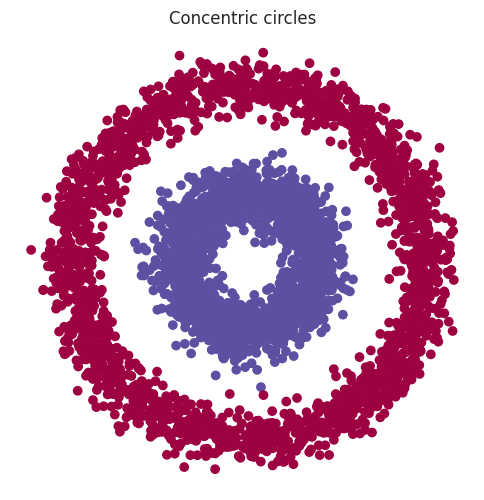

In [3]:
%autoreload 2
return_dict = concentric_circles(n_points=n_points, factor=0.385, noise=0.08, supersample=True)
circles, cluster, circles_supersample, subsample_indices = return_dict['data'], return_dict['cluster'], return_dict['data_supersample'], return_dict['subsample_indices']
color = cluster.copy()
plot_data_2D(circles, color, 'Concentric circles')

/home/tristan/envs/orcml/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


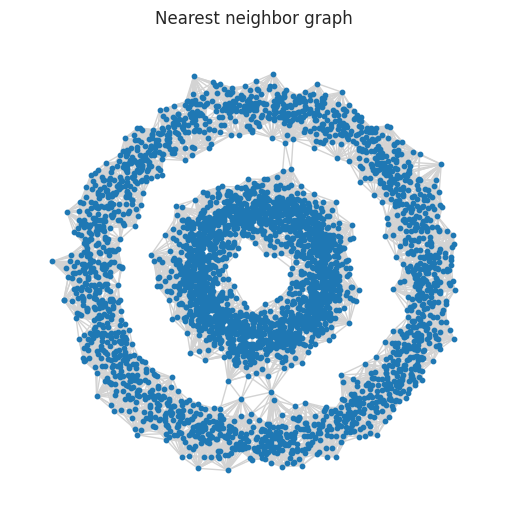

In [4]:
%autoreload 2
n_neighbors = 20
G, A = make_prox_graph(circles, mode='nbrs', n_neighbors=n_neighbors)
plot_graph_2D(circles, G, 'Nearest neighbor graph')

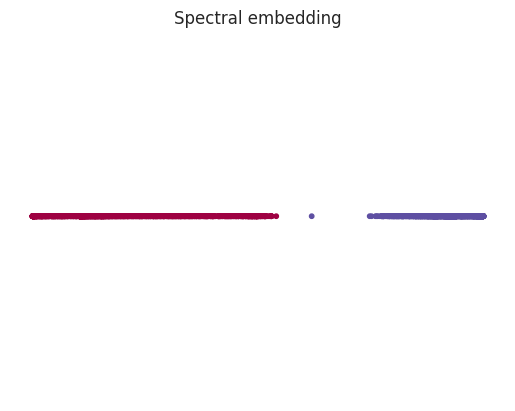

In [5]:
%autoreload 2
# run spectral embedding
Y = spectral_embedding(A, n_components=1)
plot_emb(Y, color, 'Spectral embedding')

/home/tristan/envs/orcml/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


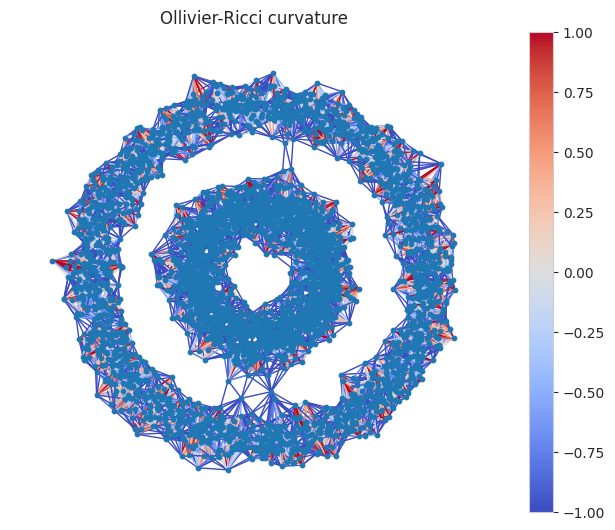

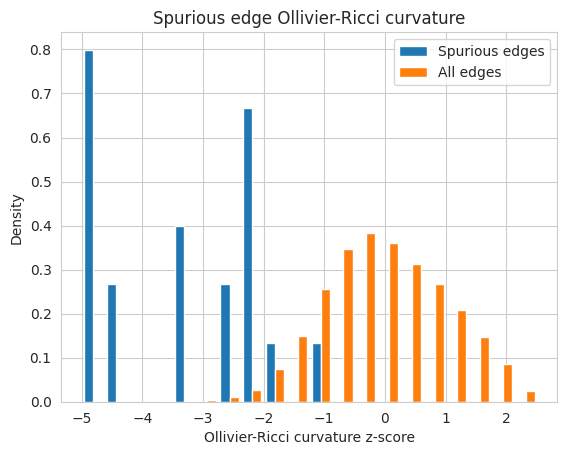

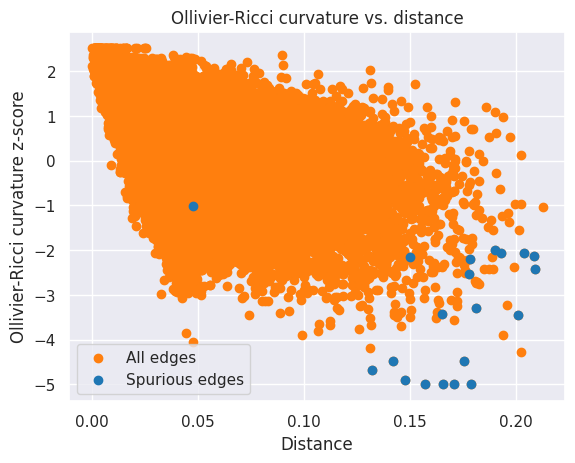

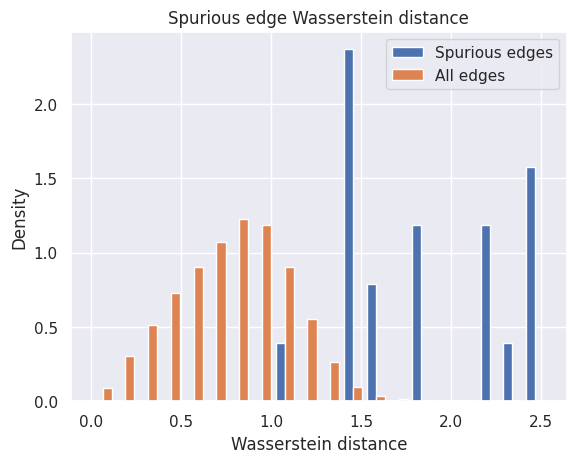

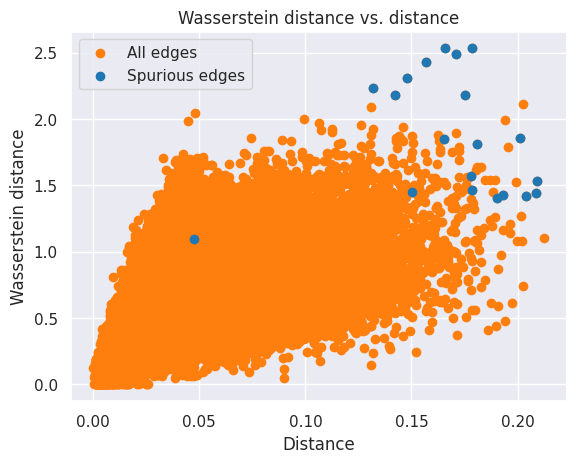

In [6]:
%autoreload 2
return_dict = graph_orc(G, weight='unweighted_dist')
G_orc = return_dict['G']
scaled_orcs = return_dict['scaled_orcs']
wasserstein_distances = return_dict['wasserstein_distances']
plot_graph_2D(circles, G_orc, 'Ollivier-Ricci curvature', edge_color=scaled_orcs, colorbar=True)

# plot histogram of ORC, distances for spurious edges
return_dict = spurious_edge_orc(G_orc, cluster)
spurious_edge_scaled_orcs = return_dict['spurious_edge_scaled_orcs']
spurious_edge_distances = return_dict['spurious_edge_distances']
spurious_edge_scaled_orcs = np.clip(spurious_edge_scaled_orcs, -5, 5)
spurious_edge_wasserstein_distances = return_dict['spurious_edge_wasserstein_distances']

all_edge_scaled_orcs = np.clip(scaled_orcs, -5, 5)
all_edge_distances = np.array([G_orc[u][v]['weight'] for u, v in G_orc.edges])
histogram([spurious_edge_scaled_orcs, all_edge_scaled_orcs], 'Spurious edge Ollivier-Ricci curvature', 'Ollivier-Ricci curvature z-score', 'Density', legend=['Spurious edges', 'All edges'], bins=20)
plot_scatter(
    [all_edge_distances, spurious_edge_distances],
    [all_edge_scaled_orcs, spurious_edge_scaled_orcs],
    'Ollivier-Ricci curvature vs. distance',
    'Distance',
    'Ollivier-Ricci curvature z-score',
    ['All edges', 'Spurious edges'],
    color=['#ff7f0e','#1f77b4']
)
histogram([spurious_edge_wasserstein_distances, wasserstein_distances], 'Spurious edge Wasserstein distance', 'Wasserstein distance', 'Density', legend=['Spurious edges', 'All edges'], bins=20)
plot_scatter(
    [all_edge_distances, spurious_edge_distances],
    [wasserstein_distances, spurious_edge_wasserstein_distances],
    'Wasserstein distance vs. distance',
    'Distance',
    'Wasserstein distance',
    ['All edges', 'Spurious edges'],
    color=['#ff7f0e','#1f77b4']
)

In [2]:
%autoreload 2
# get edge attributes
pruned = prune_adaptive(G_orc, circles, eps=None, lda=0.25, delta=1.5, cluster=cluster)
plot_graph_2D(circles, pruned['G_pruned'], 'Pruned graph', edge_color=pruned['preserved_scaled_orcs'], colorbar=True)
print()

UsageError: Line magic function `%autoreload` not found.


In [ ]:
%autoreload 2
# run spectral embedding on pruned graph
A_pruned = nx.adjacency_matrix(pruned['G_pruned']).toarray()
Y = spectral_embedding(A_pruned, n_components=1)

plot_emb(Y, color[nx.nodes(pruned['G_pruned'])], 'Spectral embedding of pruned graph', exp_name=exp_name, filename='concentric_circles_pruned_spectral_emb.png')

In [ ]:
%autoreload 2
G_supersample, A_supersample = make_prox_graph(circles_supersample, mode='nbrs', n_neighbors=n_neighbors)
pruned_distortion = intercluster_distortion(
    A_supersample, 
    A_pruned, 
    cluster, 
    node_indices=list(pruned['G_pruned'].nodes()),
    supersample=True,
    subsample_indices=subsample_indices
)
unpruned_distortion = intercluster_distortion(
    A_supersample, 
    A, 
    cluster, 
    supersample=True,
    subsample_indices=subsample_indices
)
print(f'Mean distortion of pruned graph: {np.mean(pruned_distortion)}')
print(f'Mean distortion of unpruned graph: {np.mean(unpruned_distortion)}')

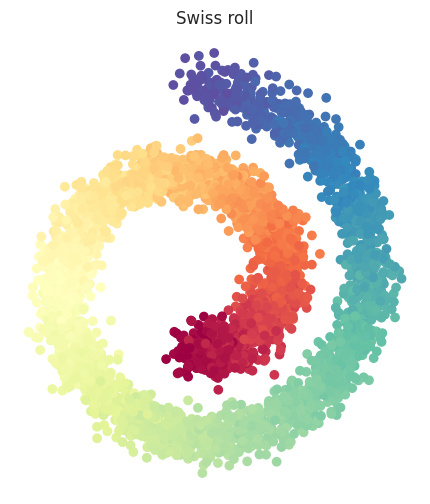

In [8]:
%autoreload 2
# swiss roll
return_dict = swiss_roll(n_points, noise=0.925, dim=2, supersample=True)
swiss_roll_data, color, swiss_roll_supersample, subsample_indices = return_dict['data'], return_dict['cluster'], return_dict['data_supersample'], return_dict['subsample_indices']
plot_data_2D(swiss_roll_data, color, 'Swiss roll')

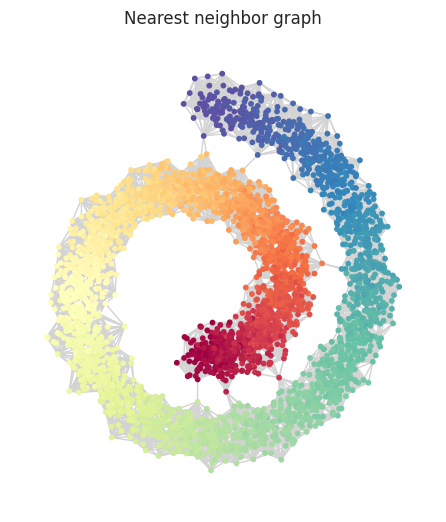

In [9]:
%autoreload 2
n_neighbors = 20
G, A = make_prox_graph(swiss_roll_data, mode='nbrs', n_neighbors=n_neighbors)
plot_graph_2D(swiss_roll_data, G, 'Nearest neighbor graph', node_color=color[nx.nodes(G)])

In [ ]:
%autoreload 2
n_components = 1
Y_spectral = spectral_embedding(A, n_components=n_components)
plot_emb(Y_spectral, color, 'Spectral embedding')

Y_isomap = isomap(A, n_components=1)
plot_emb(Y_isomap, color, 'Isomap')

/home/tristan/envs/orcml/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


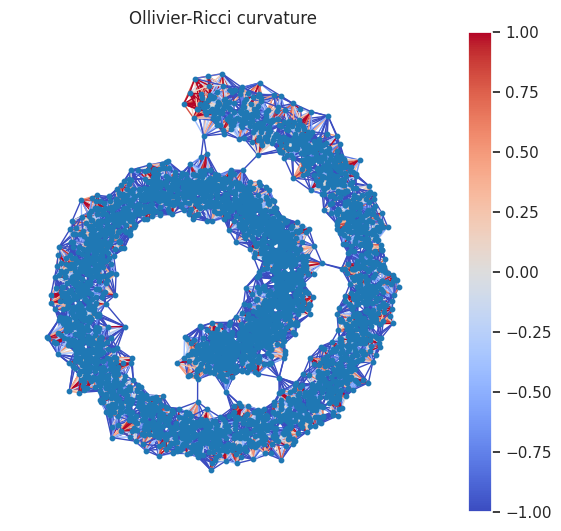

In [10]:
%autoreload 2
return_dict = graph_orc(G, weight='unweighted_dist')
G_orc = return_dict['G']
scaled_orcs = return_dict['scaled_orcs']
plot_graph_2D(swiss_roll_data, G_orc, 'Ollivier-Ricci curvature', edge_color=scaled_orcs, colorbar=True)


Number of candidate edges: 2955
Distance Threshold: 5.337363876931022

0. Edge: 122 - 943
d_G_prime: 1.0878918188380315
Threshold: 5.337363876931022


1. Edge: 122 - 2323
d_G_prime: 0.8716716356323333
Threshold: 5.337363876931022


2. Edge: 122 - 2636
d_G_prime: 1.0665134977983772
Threshold: 5.337363876931022


3. Edge: 360 - 391
d_G_prime: 0.6374154914635864
Threshold: 5.337363876931022


4. Edge: 360 - 3360
d_G_prime: 0.67904434784593
Threshold: 5.337363876931022


5. Edge: 516 - 642
d_G_prime: 0.6854810322593352
Threshold: 5.337363876931022


6. Edge: 516 - 3991
d_G_prime: 0.7812890585153
Threshold: 5.337363876931022


7. Edge: 548 - 2385
d_G_prime: 0.613494698230086
Threshold: 5.337363876931022


8. Edge: 895 - 2137
d_G_prime: 0.7877640568788643
Threshold: 5.337363876931022


9. Edge: 1899 - 724
d_G_prime: 0.6670715734846481
Threshold: 5.337363876931022


10. Edge: 1899 - 1869
d_G_prime: 0.7143920410436517
Threshold: 5.337363876931022


11. Edge: 1899 - 2692
d_G_prime: 0.7818683897

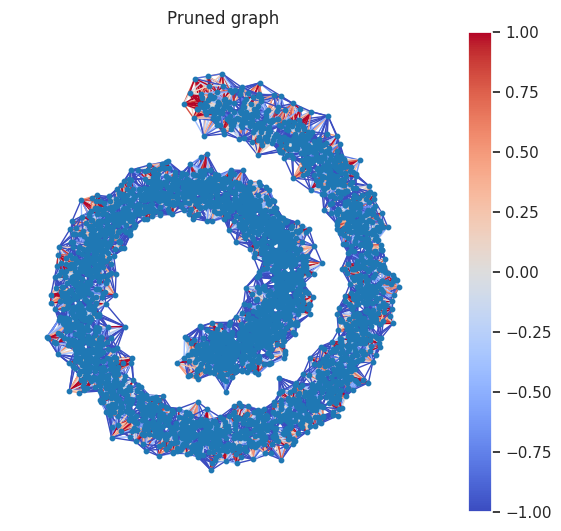

In [11]:
%autoreload 2
# get edge attributes
pruned = prune_adaptive(G_orc, swiss_roll_data, eps=None, lda=0.25, delta=1.5, cluster=None)
plot_graph_2D(swiss_roll_data, pruned['G_pruned'], 'Pruned graph', edge_color=pruned['preserved_scaled_orcs'], colorbar=True)

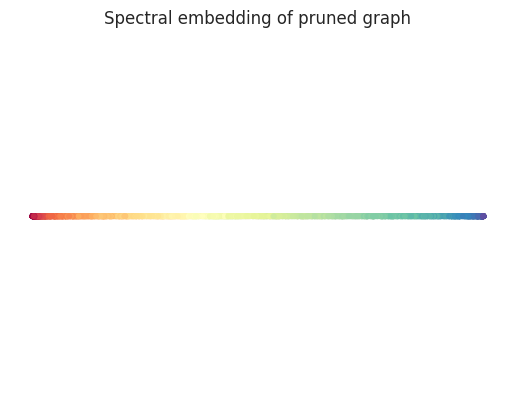

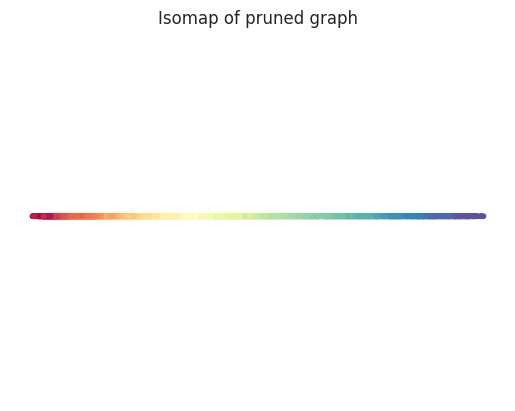

In [12]:
%autoreload 2
# run spectral embedding on pruned graph
A_pruned = nx.adjacency_matrix(pruned['G_pruned']).toarray()
Y = spectral_embedding(A_pruned, n_components=1)
plot_emb(Y, color[list(pruned['G_pruned'])], 'Spectral embedding of pruned graph')

# run isomap on pruned graph
Y = isomap(A_pruned, n_components=1)
plot_emb(Y, color[list(pruned['G_pruned'])], 'Isomap of pruned graph')

In [ ]:
%autoreload 2
G_supersample, A_supersample = make_prox_graph(swiss_roll_supersample, mode='nbrs', n_neighbors=n_neighbors)
pruned_distortion = intercluster_distortion(
    A_supersample, 
    A_pruned, 
    cluster=np.zeros(len(swiss_roll_data)), # one connected component 
    node_indices=list(pruned['G_pruned'].nodes()),
    supersample=True,
    subsample_indices=subsample_indices
)
unpruned_distortion = intercluster_distortion(
    A_supersample, 
    A, 
    cluster=np.zeros(len(swiss_roll_data)), # one connected component 
    supersample=True,
    subsample_indices=subsample_indices
)
print(f'Mean distortion of pruned graph: {np.mean(pruned_distortion)}')
print(f'Mean distortion of unpruned graph: {np.mean(unpruned_distortion)}')

In [ ]:
noises = [0.2, 0.25, 0.3, 0.35, 0.4]
mean_max_orcs, std_max_orcs, noises = noise_vs_orc_experiment(
    n_runs=5,
    noises=noises,
    data_function=torus,
    data_function_kwargs={
        'n_points': 2000,
        'r': 1.5,
        'R': 5,
        'double': True
    }
)
plot_line_graph(noises, mean_max_orcs, 'Noise vs. ORC: Double Torus', 'Noise', 'Max ORC of Spurious edges', filename='noise_vs_orc_double_torus.png', exp_name=exp_name, std=std_max_orcs)

In [ ]:
%autoreload 2
r = 1.5
R = 5
return_dict = torus(n_points = 2000, noise=0.28, r=r, R=R, double=True, supersample=True, supersample_factor=2.5)
torus_double_points, color, cluster, torus_double_supersample, subsample_indices = return_dict['data'], return_dict['color'], return_dict['cluster'], return_dict['data_supersample'], return_dict['subsample_indices']
# plot data
plot_data_3D(torus_double_points, color, 'Double Torus')

In [ ]:
# get graph
n_neighbors = 20
G, A = make_prox_graph(torus_double_points, mode='nbrs', n_neighbors=n_neighbors)
# print number of connected components of A
print('Number of connected components of A: ', nx.number_connected_components(nx.from_numpy_array(A)))
plot_graph_3D(torus_double_points, G, 'Nearest neighbor graph', node_color=color)

In [ ]:
%autoreload 2
# orc
return_dict = graph_orc(G, weight='unweighted_dist')
G_orc = return_dict['G']
scaled_orcs = return_dict['scaled_orcs']
wasserstein_distances = return_dict['wasserstein_distances']

plot_graph_3D(torus_double_points, G_orc, 'Ollivier-Ricci curvature', edge_color=scaled_orcs, colorbar=True)
return_dict = spurious_edge_orc(G_orc, cluster)
spurious_edge_scaled_orcs = return_dict['spurious_edge_scaled_orcs']
spurious_edge_distances = return_dict['spurious_edge_distances']
spurious_edge_scaled_orcs = np.clip(spurious_edge_scaled_orcs, -5, 5)
spurious_edge_wasserstein_distances = return_dict['spurious_edge_wasserstein_distances']

# all_edge_scaled_orcs = np.clip(scaled_orcs, -5, 5)
# all_edge_distances = np.array([G_orc[u][v]['weight'] for u, v in G_orc.edges])

# histogram([spurious_edge_scaled_orcs, all_edge_scaled_orcs], 'Spurious edge Ollivier-Ricci curvature', 'Ollivier-Ricci curvature z-score', 'Density', legend=['Spurious edges', 'All edges'], bins=20)
# plot_scatter(
#     [all_edge_distances, spurious_edge_distances],
#     [all_edge_scaled_orcs, spurious_edge_scaled_orcs],
#     'Ollivier-Ricci curvature vs. distance',
#     'Distance',
#     'Ollivier-Ricci curvature z-score',
#     ['All edges', 'Spurious edges'],
#     color=['#ff7f0e','#1f77b4']

# )
# histogram([spurious_edge_wasserstein_distances, wasserstein_distances], 'Spurious edge Wasserstein distance', 'Wasserstein distance', 'Density', legend=['Spurious edges', 'All edges'], bins=20)
# plot_scatter(
#     [all_edge_distances, spurious_edge_distances],
#     [wasserstein_distances, spurious_edge_wasserstein_distances],
#     'Wasserstein distance vs. distance',
#     'Distance',
#     'Wasserstein distance',
#     ['All edges', 'Spurious edges'],
#     color=['#ff7f0e','#1f77b4']
# )

In [ ]:
%autoreload 2
# get edge attributes
pruned = prune_adaptive(G_orc, torus_double_points, eps=None, lda=0.1, delta=1.5, cluster=cluster)
plot_graph_3D(torus_double_points, pruned['G_pruned'], 'Pruned graph', edge_color=pruned['preserved_scaled_orcs'], colorbar=True)

A_pruned = nx.adjacency_matrix(pruned['G_pruned']).toarray()
# print number of connected components of A
print('Number of connected components of A_pruned: ', nx.number_connected_components(nx.from_numpy_array(A_pruned)))

In [ ]:
%autoreload 2
G_supersample, A_supersample = make_prox_graph(torus_double_supersample, mode='nbrs', n_neighbors=n_neighbors)
pruned_distortion = intercluster_distortion(
    A_supersample, 
    A_pruned, 
    cluster, 
    node_indices=list(pruned['G_pruned'].nodes()),
    supersample=True,
    subsample_indices=subsample_indices
)
unpruned_distortion = intercluster_distortion(
    A_supersample, 
    A, 
    cluster, 
    supersample=True,
    subsample_indices=subsample_indices
)
print(f'Mean distortion of pruned graph: {np.mean(pruned_distortion)}')
print(f'Mean distortion of unpruned graph: {np.mean(unpruned_distortion)}')

In [ ]:
noises = [0.04, 0.06, 0.08, 0.1, 0.12]
mean_max_orcs, std_max_orcs, noises = noise_vs_orc_experiment(
    n_runs=5,
    noises=noises,
    data_function=hyperboloid,
    data_function_kwargs={
        'n_points': 2000,
        'double': True
    }
)
plot_line_graph(noises, mean_max_orcs, 'Noise vs. ORC: Double Hyperboloid', 'Noise', 'Max ORC of Spurious edges', filename='noise_vs_orc_double_hyperboloid.png', exp_name=exp_name, std=std_max_orcs)

In [ ]:
%autoreload 2
return_dict = hyperboloid(n_points = 3000, noise=0.09, double=True, supersample=True, supersample_factor=2.5)
double_hyperboloid_data, color, cluster, hyperboloid_subsample, subsample_indices = return_dict['data'], return_dict['color'], return_dict['cluster'], return_dict['data_supersample'], return_dict['subsample_indices']
plot_data_3D(double_hyperboloid_data, color, 'Double Hyperboloid')

In [ ]:
# get graph
n_neighbors = 20
G, A = make_prox_graph(double_hyperboloid_data, mode='nbrs', n_neighbors=n_neighbors)
# print number of connected components of A
print('Number of connected components of A: ', nx.number_connected_components(nx.from_numpy_array(A)))
plot_graph_3D(double_hyperboloid_data, G, 'Nearest neighbor graph', node_color=color)

In [ ]:
# orc
return_dict = graph_orc(G, weight='unweighted_dist')
G_orc = return_dict['G']
scaled_orcs = return_dict['scaled_orcs']
wasserstein_distances = return_dict['wasserstein_distances']

plot_graph_3D(double_hyperboloid_data, G_orc, 'Ollivier-Ricci curvature', edge_color=scaled_orcs, colorbar=True)
# return_dict = spurious_edge_orc(G_orc, cluster)
# spurious_edge_orcs = return_dict['spurious_edge_scaled_orcs']
# spurious_edge_orcs = np.clip(spurious_edge_orcs, -5, 5)
# spurious_edge_distances = return_dict['spurious_edge_distances']
# spurious_edge_wasserstein_distances = return_dict['spurious_edge_wasserstein_distances']

# all_edge_scaled_orcs = np.clip(scaled_orcs, -5, 5)
# all_edge_distances = np.array([G_orc[u][v]['weight'] for u, v in G_orc.edges])
# histogram([spurious_edge_orcs, all_edge_scaled_orcs], 'Spurious edge Ollivier-Ricci curvature', 'Ollivier-Ricci curvature z-score', 'Density', legend=['Spurious edges', 'All edges'], bins=20)
# plot_scatter(
#     [all_edge_distances, spurious_edge_distances],
#     [all_edge_scaled_orcs, spurious_edge_orcs],
#     'Ollivier-Ricci curvature vs. distance',
#     'Distance',
#     'Ollivier-Ricci curvature z-score',
#     ['All edges', 'Spurious edges'],
#     color=['#ff7f0e','#1f77b4']

# )
# histogram([spurious_edge_wasserstein_distances, wasserstein_distances], 'Spurious edge Wasserstein distance', 'Wasserstein distance', 'Density', legend=['Spurious edges', 'All edges'], bins=20)
# plot_scatter(
#     [all_edge_distances, spurious_edge_distances],
#     [wasserstein_distances, spurious_edge_wasserstein_distances],
#     'Wasserstein distance vs. distance',
#     'Distance',
#     'Wasserstein distance',
#     ['All edges', 'Spurious edges'],
#     color=['#ff7f0e','#1f77b4']
# )

In [ ]:
%autoreload 2
# get edge attributes
pruned = prune_adaptive(G_orc, double_hyperboloid_data, eps=None, lda=0.25, delta=1.5, cluster=cluster)
plot_graph_3D(double_hyperboloid_data, pruned['G_pruned'], 'Pruned graph', edge_color=pruned['preserved_scaled_orcs'], colorbar=True)

A_pruned = nx.adjacency_matrix(pruned['G_pruned']).toarray()
# print number of connected components of A
print('Number of connected components of A_pruned: ', nx.number_connected_components(nx.from_numpy_array(A_pruned)))

In [ ]:
%autoreload 2
G_supersample, A_supersample = make_prox_graph(hyperboloid_subsample, mode='nbrs', n_neighbors=n_neighbors)
pruned_distortion = intercluster_distortion(
    A_supersample, 
    A_pruned, 
    cluster, 
    node_indices=list(pruned['G_pruned'].nodes()),
    supersample=True,
    subsample_indices=subsample_indices
)
unpruned_distortion = intercluster_distortion(
    A_supersample, 
    A, 
    cluster, 
    supersample=True,
    subsample_indices=subsample_indices
)
print(f'Mean distortion of pruned graph: {np.mean(pruned_distortion)}')
print(f'Mean distortion of unpruned graph: {np.mean(unpruned_distortion)}')